In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

srp_folder = "/content/drive/MyDrive/datasets/srp"  # Update this path if needed

# List all subfolders inside SRP
subfolders = [f for f in os.listdir(srp_folder) if os.path.isdir(os.path.join(srp_folder, f))]

print("Subfolders in SRP:", subfolders)


Subfolders in SRP: ['Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczemaa', 'eksim', 'herpes', 'panu', 'melanoma', 'acne', 'rosacea']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

# Check TensorFlow version
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.18.0


In [ ]:
# Define dataset directory (Google Drive path)
dataset_dir =  "/content/drive/MyDrive/datasets/srp"  # Update with your correct path

# Define batch size and image size
batch_size = 32
img_size = (224, 224)

# Load dataset and assign labels based on folder names
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,   # 80% Train, 20% Validation
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Get class names (folder names)
class_names = train_data.class_names
print("Detected Disease Categories:", class_names)

# Normalize pixel values (rescale between 0 and 1)
normalization_layer = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))


Found 2430 files belonging to 9 classes.
Using 1944 files for training.
Found 2430 files belonging to 9 classes.
Using 486 files for validation.
Detected Disease Categories: ['Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczemaa', 'acne', 'eksim', 'herpes', 'melanoma', 'panu', 'rosacea']


In [ ]:
# CNN Model for Disease Classification
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # To prevent overfitting
    layers.Dense(len(class_names), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN Model
epochs = 20  # Increase if needed

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 522s 8s/step - accuracy: 0.2934 - loss: 2.6894 - val_accuracy: 0.4753 - val_loss: 1.4628
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 50s 136ms/step - accuracy: 0.4475 - loss: 1.4893 - val_accuracy: 0.5000 - val_loss: 1.3489
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.4858 - loss: 1.3736 - val_accuracy: 0.4877 - val_loss: 1.2561
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.5238 - loss: 1.2673 - val_accuracy: 0.5247 - val_loss: 1.2363
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.5572 - loss: 1.1738 - val_accuracy: 0.5453 - val_loss: 1.2002
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.5932 - loss: 1.0761 - val_accuracy: 0.5720 - val_loss: 1.1458
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.6550 - loss: 0.9716 - val_accuracy: 0.5926 - val_loss: 1.0526
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.6417 - loss: 0.9330 - val_accuracy:

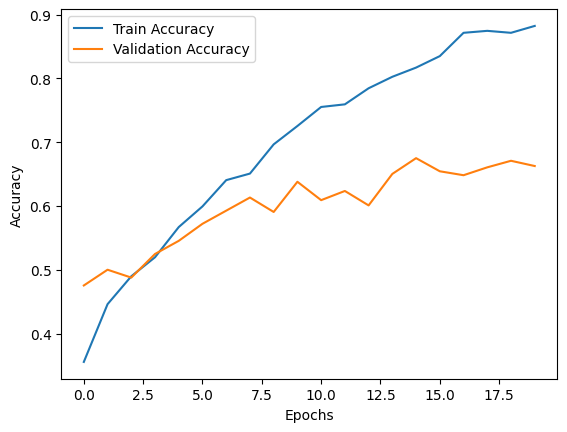

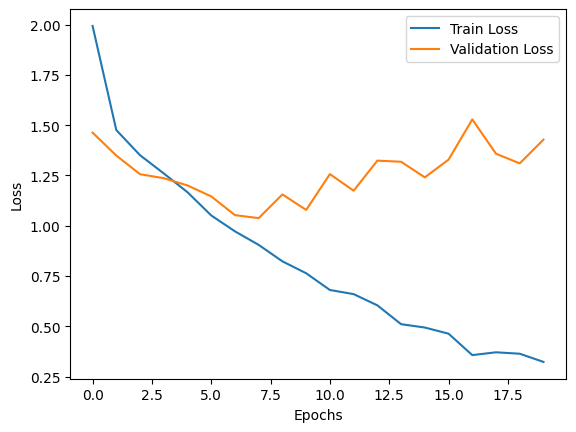

In [ ]:
# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("skin_disease_cnn_model.keras")


In [ ]:
loaded_model = keras.models.load_model("skin_disease_cnn_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model_path = "/content/drive/My Drive/skin_disease_cnn_model.keras"


In [ ]:
model_path = "/content/drive/My Drive/skin_disease_cnn_model.h5"


In [ ]:
model.save(model_path)
print(f"Model saved at: {model_path}")


Model saved at: /content/drive/My Drive/skin_disease_cnn_model.h5


In [ ]:
from tensorflow import keras

model_path = "/content/drive/My Drive/skin_disease_cnn_model.h5"  # Or .h5
loaded_model = keras.models.load_model(model_path)

print("Model loaded successfully!")


Model loaded successfully!
